# Задание
1. Рассчитать основные статистики (меры центра и меры разброса) по распределениям всех переменных.
2. Выбрать количественный признак и охарактеризовать его распределение при помощи соответствующих описательных статистик и графиков:

  2.1. Какова форма распределения признака?

  2.2. Можно ли говорить о том, что распределение признака согласуется с каким-либо теоретическим законом распределения?

  2.3. Есть ли в данных «аномалии» / «выбросы»?

  2.4. Какие меры центра и вариативности подходят для описания распределений лучше всего? Почему?

3. Сравнить геозависимые и геонезависимые сферы (экспертная разметка, переменная IsGeo) по выбранному для анализа признаку. Есть ли отличия? В чем они состоят?


**Первый этап. Получение данных**

Подключаем Google.Диск к Google.Colab

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем файл с данными и сохраним его в переменную data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data_Projects.csv', sep=";")

Ознакомимся с полученными данными

In [ ]:
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,"0,416104363472785","0,535762483130904",1125,"749,966084023684",1
1,17,37,258,20,"0,211678832116788","0,430656934306569",157,"2289,03242434015",0
2,78,56,1956,185,"0,349475383373688","0,476594027441485",1195,"1423,37651183958",1
3,14,70,378,19,"0,318718381112985","0,463743676222597",206,"3396,56608856838",0
4,111,90,4089,90,"0,55617545209696","0,490573297422085",2934,"1576,51415402623",1


Данные представляют собой описательную статистику, собранную в 2ГИС по некоторому набору рубрик/сфер (бары, аптеки, продуктовые магазины) в городе Новосибирск.

В таблице 9 столбцов, и они содержат следующую информацию:

*   AddressCount - количество кликов в адреса и/или входы. Клик во вход – это клик пользователя в кнопку «Вход».
*   CallsCount - количество звонков в организации. Звонки – это клики 
пользователя в кнопку «Телефон» в карточке организации.
*   ClicksCount - клики пользователя в организацию в результатах поисковой выдачи, после чего открывается карточка организации.
*   FirmsCount - количество организаций в той или иной сфере.
*   GeoPart - доля трафика с карты.
*   MobilePart - доля трафика с мобильных продуктов.
*   UsersCount - количество уникальных пользователей, которые совершали какие–то действия в данной сфере – открывали карточки организаций, тыкали во вход/адрес звонок и т.д.
*   Distance -  медианная дистанция от пользователя до организации при совершении клика.
*   IsGeo - признак геозависимой сферы:
1 – геозависимая сфера;
0 – геонезависимая сфера (по экспертной разметке).










In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AddressCount  79 non-null     int64 
 1   CallsCount    79 non-null     int64 
 2   ClicksCount   79 non-null     int64 
 3   FirmsCount    79 non-null     int64 
 4   GeoPart       79 non-null     object
 5   MobilePart    79 non-null     object
 6   UsersCount    79 non-null     int64 
 7   Distance      79 non-null     object
 8   IsGeo         79 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 5.7+ KB


**Выводы**

Наши данные содержат 9 столбцов и 79 строк, из которых 6 имеют числовой тип данных и 3 - строковый.
Так как количество значений для каждого столбца совпадает с длиной таблицы, пропущенных значений у нас нет.

Также обращаю внимание, что столбец IsGeo содержит номинальные данные, поэтому для него можно рассчитать только один признак вариативности - моду.


**Второй этап. Предобработка данных**

Так как нам предстоит работать с числовыми значениями, приведем столбцы со значениями типа object к числовому типу данных и заменим неподходящие символы

In [ ]:
data['GeoPart'] = data['GeoPart'].str.replace(',', '.')
data['MobilePart'] = data['MobilePart'].str.replace(',', '.')
data['Distance'] = data['Distance'].str.replace(',', '.')

In [ ]:
data['GeoPart'] = pd.to_numeric(data['GeoPart'])
data['MobilePart'] = pd.to_numeric(data['MobilePart'])
data['Distance'] = pd.to_numeric(data['Distance'])

In [ ]:
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,0.416104,0.535762,1125,749.966084,1
1,17,37,258,20,0.211679,0.430657,157,2289.032424,0
2,78,56,1956,185,0.349475,0.476594,1195,1423.376512,1
3,14,70,378,19,0.318718,0.463744,206,3396.566089,0
4,111,90,4089,90,0.556175,0.490573,2934,1576.514154,1


In [ ]:
data.dtypes

AddressCount      int64
CallsCount        int64
ClicksCount       int64
FirmsCount        int64
GeoPart         float64
MobilePart      float64
UsersCount        int64
Distance        float64
IsGeo             int64
dtype: object

**Выводы**

Мы преобразовали типы данных в числовые и избавились от неверных символов.


**Третий этап.**

**1. Рассчитываем основные характеристики (меры центра и меры разброса) по распределениям всех переменных**

Создадим таблицу, в которую будем записывать меры центра и изменчивости.

In [ ]:
center_and_variability_measures = pd.DataFrame()

In [ ]:
data_columns = list(data.columns)
data_columns

['AddressCount',
 'CallsCount',
 'ClicksCount',
 'FirmsCount',
 'GeoPart',
 'MobilePart',
 'UsersCount',
 'Distance',
 'IsGeo']

Добавим в таблицу значения моды и медианы.

In [ ]:
columns = list(data)
for i in columns:
  mean = round(data[i].mean(), 2)
  median = round(data[i].median(), 2)
  new = pd.DataFrame({'mean': [mean], 'median': [median]})
  center_and_variability_measures = center_and_variability_measures.append(new)

Как мы знаем, значений моды может быть несколько для каждого столбца.
Проверим это.

In [ ]:
mode_list = []
for i in columns:
  mode = round(data[i].mode(), 2)
  mode_list.append(mode)
mode_list

[0    175
 1    439
 dtype: int64, 0        20
 1        37
 2        56
 3        70
 4        90
       ...  
 74    12436
 75    12805
 76    20609
 77    47912
 78    48497
 Length: 79, dtype: int64, 0        258
 1        373
 2        378
 3        563
 4        976
        ...  
 74     75789
 75     94918
 76    101558
 77    149920
 78    167155
 Length: 79, dtype: int64, 0     19
 1    185
 2    197
 dtype: int64, 0     0.09
 1     0.14
 2     0.15
 3     0.19
 4     0.19
       ... 
 74    0.53
 75    0.53
 76    0.54
 77    0.54
 78    0.56
 Length: 79, dtype: float64, 0     0.09
 1     0.13
 2     0.14
 3     0.18
 4     0.20
       ... 
 74    0.67
 75    0.67
 76    0.68
 77    0.71
 78    0.74
 Length: 79, dtype: float64, 0       157
 1       180
 2       206
 3       265
 4       410
       ...  
 74    40147
 75    40614
 76    54098
 77    58351
 78    61127
 Length: 79, dtype: int64, 0      714.79
 1      749.97
 2      762.64
 3      813.44
 4      854.17
        .

Как видим, большинсвто значений в стобцах имеют уникальные значения для каждой ячейки, поэтому моду для них посчитать нельзя.
Проверим столбцы с минимальными значениями.

In [ ]:
data.AddressCount[data.AddressCount == 439].count()

2

In [ ]:
data.AddressCount[data.AddressCount == 175].count()

2

In [ ]:
data.FirmsCount[data.FirmsCount == 19].count()

2

In [ ]:
data.FirmsCount[data.FirmsCount == 185].count()

2

In [ ]:
data.FirmsCount[data.FirmsCount == 197].count()

2

In [ ]:
data.IsGeo[data.IsGeo == 0].count()

51

Таким образом, значение моды можно посчитать только для последнего столбца.

Добавляем столбец со значениями моды в таблицу.

In [ ]:
mode_list = []
for i in range(0, 8):
  mode_list.append('no')
mode_list.append(0)
mode_list

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 0]

In [ ]:
center_and_variability_measures['mode'] = mode_list
center_and_variability_measures.index = data_columns
center_and_variability_measures

,mean,median,mode
AddressCount,1048.04,371.00,no
CallsCount,3648.68,931.00,no
ClicksCount,21826.01,6921.00,no
FirmsCount,305.09,185.00,no
GeoPart,0.34,0.32,no
MobilePart,0.45,0.46,no
UsersCount,9753.13,2934.00,no
Distance,2669.43,2586.50,no
IsGeo,0.35,0.00,0


Теперь рассчитаем меры изменчивости и добавим их в таблицу

Почитаем размах и добавим его в таблицу.

In [ ]:
sweep_list = []
for i in columns:
  sweep = round(data[i].max() - data[i].min(), 2)
  sweep_list.append(sweep)
sweep_list

[9543, 48477, 166897, 2365, 0.46, 0.65, 60970, 5577.42, 1]

In [ ]:
center_and_variability_measures['sweep'] = sweep_list

Посчитаем дисперсию и добавим ее в таблицу.

In [ ]:
dispersion_list = []
for i in columns:
  dispersion = round(np.var(data[i]), 4)
  dispersion_list.append(dispersion)

In [ ]:
center_and_variability_measures['dispersion'] = dispersion_list
center_and_variability_measures

,mean,median,mode,sweep,dispersion
AddressCount,1048.04,371.00,no,9543.00,2.662250e+06
CallsCount,3648.68,931.00,no,48477.00,6.516563e+07
ClicksCount,21826.01,6921.00,no,166897.00,1.041273e+09
FirmsCount,305.09,185.00,no,2365.00,1.441162e+05
GeoPart,0.34,0.32,no,0.46,1.060000e-02
MobilePart,0.45,0.46,no,0.65,2.110000e-02
UsersCount,9753.13,2934.00,no,60970.00,1.915143e+08
Distance,2669.43,2586.50,no,5577.42,2.012766e+06
IsGeo,0.35,0.00,0,1.00,2.288000e-01


Посчитаем среднеквадратическое отклонение и добавим в таблицу.

In [ ]:
std_list = []
for i in columns:
  std = round(np.std(data[i]), 2)
  std_list.append(std)
std_list

[1631.64, 8072.52, 32268.77, 379.63, 0.1, 0.15, 13838.87, 1418.72, 0.48]

In [ ]:
center_and_variability_measures['std'] = std_list
center_and_variability_measures

,mean,median,mode,sweep,dispersion,std
AddressCount,1048.04,371.00,no,9543.00,2.662250e+06,1631.64
CallsCount,3648.68,931.00,no,48477.00,6.516563e+07,8072.52
ClicksCount,21826.01,6921.00,no,166897.00,1.041273e+09,32268.77
FirmsCount,305.09,185.00,no,2365.00,1.441162e+05,379.63
GeoPart,0.34,0.32,no,0.46,1.060000e-02,0.10
MobilePart,0.45,0.46,no,0.65,2.110000e-02,0.15
UsersCount,9753.13,2934.00,no,60970.00,1.915143e+08,13838.87
Distance,2669.43,2586.50,no,5577.42,2.012766e+06,1418.72
IsGeo,0.35,0.00,0,1.00,2.288000e-01,0.48


Рассчитаем медианное абсолютное отклонение и добавим в таблицу.

In [ ]:
mad_list = []
for i in columns:
  mad = round(sum([abs(data[i].median() - xi) for xi in data[i]])/len(data), 2)
  mad_list.append(mad)
mad_list

[928.53, 3255.15, 19292.3, 223.84, 0.08, 0.12, 8500.11, 1146.54, 0.35]

In [ ]:
center_and_variability_measures['mad'] = mad_list
center_and_variability_measures

,mean,median,mode,sweep,dispersion,std,mad
AddressCount,1048.04,371.00,no,9543.00,2.662250e+06,1631.64,928.53
CallsCount,3648.68,931.00,no,48477.00,6.516563e+07,8072.52,3255.15
ClicksCount,21826.01,6921.00,no,166897.00,1.041273e+09,32268.77,19292.30
FirmsCount,305.09,185.00,no,2365.00,1.441162e+05,379.63,223.84
GeoPart,0.34,0.32,no,0.46,1.060000e-02,0.10,0.08
MobilePart,0.45,0.46,no,0.65,2.110000e-02,0.15,0.12
UsersCount,9753.13,2934.00,no,60970.00,1.915143e+08,13838.87,8500.11
Distance,2669.43,2586.50,no,5577.42,2.012766e+06,1418.72,1146.54
IsGeo,0.35,0.00,0,1.00,2.288000e-01,0.48,0.35


Рассчитаем последнюю меру изменчивости - межквартильный размах. 

In [ ]:
bqs_list = []
for i in columns:
  bqs = round(data[i].quantile(0.75, interpolation='nearest') - data[i].quantile(0.25, interpolation='nearest'), 2)
  bqs_list.append(bqs)

In [ ]:
center_and_variability_measures['bqs'] = bqs_list

Так как IsGeo содержит номинальные данные, все меры, кроме моды для него некорректны, поэтому заменим получившиеся значения.

In [ ]:
center_and_variability_measures.iloc[8, 0:2] = '-'
center_and_variability_measures.iloc[8, 3:8] = '-'

In [ ]:
center_and_variability_measures

,mean,median,mode,sweep,dispersion,std,mad,bqs
AddressCount,1048.04,371,no,9543,2.66225e+06,1631.64,928.53,1086
CallsCount,3648.68,931,no,48477,6.51656e+07,8072.52,3255.15,2092
ClicksCount,21826,6921,no,166897,1.04127e+09,32268.8,19292.3,27691
FirmsCount,305.09,185,no,2365,144116,379.63,223.84,317
GeoPart,0.34,0.32,no,0.46,0.0106,0.1,0.08,0.13
MobilePart,0.45,0.46,no,0.65,0.0211,0.15,0.12,0.19
UsersCount,9753.13,2934,no,60970,1.91514e+08,13838.9,8500.11,11802
Distance,2669.43,2586.5,no,5577.42,2.01277e+06,1418.72,1146.54,1921.47
IsGeo,-,-,0,-,-,-,-,-


Мы получили таблицу со всеми значениями меры и изменчивости.





**2. Выбраем количественный признак и характеризуем его распределение при помощи соответствующих описательных статистик и графиков**

В качестве количественного признака выбрала часть мобильного трафика - MobilePart.

Построим гистограмму распределения и ящик с усами.

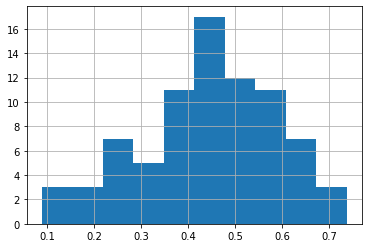

In [ ]:
data["MobilePart"].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f9dfa5dfdd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9dfa570828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9dfa5792e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9dfa570f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9dfa570128>,
  <matplotlib.lines.Line2D at 0x7f9dfa5704a8>]}

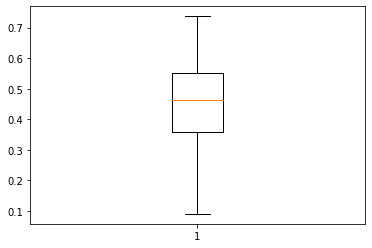

In [ ]:
plt.boxplot(x=data["MobilePart"])

**Выводы**

Распределение признака близко к нормальному, критичных аномалий либо выборосов нет, поэтому  в качесвте описательных статистик мы можем использовать среднее, разброс и среднеквадратичное отклонение. 

**3. Сравниваем геозависимые и геонезависимые сферы (экспертная разметка, переменная IsGeo) по выбранному признаку**

In [ ]:
IsGeo_0 = data[data.IsGeo == 0]

In [ ]:
IsGeo_1 = data[data.IsGeo == 1]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


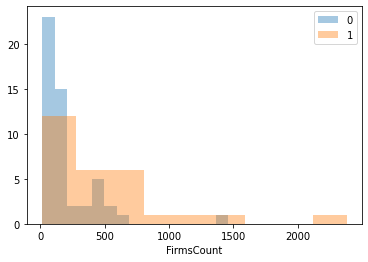

In [50]:
sns.distplot(a=IsGeo_0['FirmsCount'], label="0", kde=False)
sns.distplot(a=IsGeo_1['FirmsCount'], label="1", kde=False)
plt.legend()

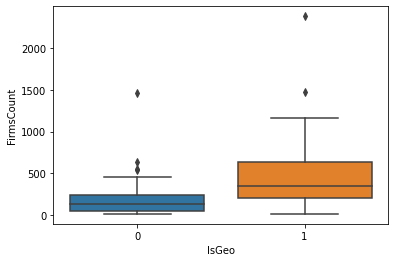

In [61]:
#sns.boxplot(data=df[df.Platform.isin(top_platforms)])
sns.boxplot(x='IsGeo', y='FirmsCount', data=data)


In [55]:
IsGeo_0['FirmsCount'].count()

51

In [54]:
IsGeo_0['FirmsCount'].sum()

10152

In [56]:
IsGeo_1['FirmsCount'].count()

28

In [53]:
IsGeo_1['FirmsCount'].sum()

13950

**Выводы:**
Распределения признака количество фирм отличются по геозависимой и геонезависимой сфер, отличаются разброс, среднее, формы распределений.
Оба распределения далеки от нормального, и в обоих присутсвуют выбросы.

Интересная особенность - для геонезависимых компаний больше разных сфер, но общее количество компаний в ней меньше, чем в геозависимой.